In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('YourCabs.csv')
dataset.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [4]:
dataset['travel_type_id'].unique()


array([2, 1, 3], dtype=int64)

In [5]:
x = dataset.drop(['Car_Cancellation'], axis=1)
y = dataset[['Car_Cancellation']]

In [6]:
x.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720


In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [8]:
y.head()

,Car_Cancellation
0,0
1,0
2,0
3,0
4,0


In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

# Checking for Missing Values¶


In [10]:
x.isnull().sum()/100

id                       0.00
user_id                  0.00
vehicle_model_id         0.00
package_id             358.81
travel_type_id           0.00
from_area_id             0.88
to_area_id              91.38
from_city_id           270.86
to_city_id             418.43
from_date                0.00
online_booking           0.00
mobile_site_booking      0.00
booking_created          0.00
from_lat                 0.93
from_long                0.93
to_lat                  91.38
to_long                 91.38
dtype: float64

#### DATA CLEANING

In [11]:
x=x.drop(['id','user_id','package_id','to_area_id','from_city_id','to_city_id'],axis=1)

In [12]:

x.head()

,vehicle_model_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,28,2,83.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750
1,12,2,1010.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640
2,12,2,1301.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766
3,12,2,768.0,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140
4,12,2,1365.0,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720


In [13]:
x['vehicle_model_id'].nunique()

27

In [14]:
x['vehicle_model_id'].value_counts(normalize=True)*100

vehicle_model_id
12    73.355437
85     5.542124
89     5.505284
65     4.402385
28     3.918860
24     3.439939
87     1.300914
90     0.718381
23     0.683843
86     0.283208
10     0.239460
64     0.195713
54     0.168083
17     0.092100
91     0.057563
30     0.032235
36     0.020723
13     0.016118
72     0.004605
1      0.004605
43     0.004605
14     0.002303
69     0.002303
76     0.002303
75     0.002303
70     0.002303
39     0.002303
Name: proportion, dtype: float64

In [15]:
x=x.drop(['vehicle_model_id'],axis=1)

In [16]:
x.head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,2,83.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750
1,2,1010.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640
2,2,1301.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766
3,2,768.0,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140
4,2,1365.0,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720


# Data Transformation

In [17]:
print(x[x['from_lat'] == x['from_lat'].median()]['from_area_id'].max())
print(x['from_lat'].median())
print(x['from_long'].median())

1044.0
12.968887
77.63575


In [18]:
x[x['from_lat'] == x['from_lat'].median()]['from_area_id']

276      1044.0
277      1044.0
1517     1044.0
1668     1044.0
3057     1044.0
3628     1044.0
3826     1044.0
4255     1044.0
4365     1044.0
4619     1044.0
4832     1044.0
4988     1044.0
5179     1044.0
7284     1044.0
7518     1044.0
7694     1044.0
8054     1044.0
8302     1044.0
8401     1044.0
10858    1044.0
11199    1044.0
11202    1044.0
11244    1044.0
14469    1044.0
15858    1044.0
15995    1044.0
16915    1044.0
16916    1044.0
17959    1044.0
18429    1044.0
18658    1044.0
21592    1044.0
22055    1044.0
25121    1044.0
26336    1044.0
29975    1044.0
32812    1044.0
35767    1044.0
36869    1044.0
37378    1044.0
39314    1044.0
40148    1044.0
Name: from_area_id, dtype: float64

# Filling Missing values

In [19]:
x['from_lat'].fillna(x['from_lat'].median(), inplace=True)
x['from_long'].fillna(x['from_long'].median(), inplace=True)

In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43343 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               34293 non-null  float64
 9   to_long              34293 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


In [21]:
x['from_area_id'].isnull().sum()/100

0.88

In [22]:
x['from_area_id'].fillna(x[x['from_lat'] == x['from_lat'].median()]['from_area_id'].max(), inplace=True)

In [23]:
x['to_lat'].isnull().sum()/100

91.38

In [24]:
x['to_lat'].fillna(dataset.groupby('from_area_id')['to_lat'].transform('median'), inplace=True)

In [25]:
x['to_lat'].isnull().sum()/100

1.05

In [26]:
x['to_lat'].head()

0    12.927320
1    12.927680
2    13.047926
3    12.971430
4    12.954340
Name: to_lat, dtype: float64

In [27]:
x['to_long'] = x['to_long'].fillna(dataset.groupby('from_area_id')['to_long'].transform('median'))

In [28]:
x['to_long'].head()

0    77.635750
1    77.626640
2    77.597766
3    77.639140
4    77.600720
Name: to_long, dtype: float64

In [29]:
x[x['to_lat'].isnull()].head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
2158,1,483.0,1/25/2013 6:00,1,0,1/24/2013 15:32,12.953020,77.56333,NaN,NaN
3945,1,1397.0,02-10-2013 16:30,1,0,02-10-2013 13:26,12.968887,77.63575,NaN,NaN
4912,1,1397.0,2/23/2013 6:30,1,0,2/19/2013 21:29,12.968887,77.63575,NaN,NaN
5144,1,1397.0,2/22/2013 13:30,1,0,2/22/2013 10:22,12.968887,77.63575,NaN,NaN
5970,1,1397.0,03-04-2013 07:00,0,0,03-02-2013 17:48,12.968887,77.63575,NaN,NaN


In [30]:
x[x['to_lat'].isnull()]['from_area_id'].value_counts()

from_area_id
1397.0    90
1396.0     3
173.0      2
17.0       2
483.0      1
1215.0     1
1265.0     1
215.0      1
1080.0     1
802.0      1
1164.0     1
178.0      1
Name: count, dtype: int64

In [31]:
x['to_lat'].fillna(x['to_lat'].median(), inplace=True)
x['to_long'].fillna(x['to_long'].median(), inplace=True)

# Encoding

In [32]:
traveltype = pd.get_dummies(x['travel_type_id'],drop_first=True)

In [33]:
x = pd.concat([x,traveltype],axis=1)
x = x.drop(['travel_type_id'],axis=1)

In [34]:
x.rename(columns={2:'traveltype_pointtopoint',3:'traveltype_hourly'},inplace=True)

In [35]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [36]:
from geopy import distance

In [37]:
def cal_distance(from_lat,from_long,to_lat,to_long):
  return distance.distance((from_lat,from_long),(to_lat,to_long)).km

In [38]:
x['distance'] = x.apply(lambda row: cal_distance(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']),axis=1)

In [39]:
x = x.drop(['from_lat','from_long','to_lat','to_long'],axis=1)

In [40]:
x.head()

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,traveltype_pointtopoint,traveltype_hourly,distance
0,83.0,01-01-2013 02:00,0,0,01-01-2013 01:39,True,False,3.980687
1,1010.0,01-01-2013 09:00,0,0,01-01-2013 02:25,True,False,14.004432
2,1301.0,01-01-2013 03:30,0,0,01-01-2013 03:08,True,False,12.648909
3,768.0,01-01-2013 05:45,0,0,01-01-2013 04:39,True,False,9.534596
4,1365.0,01-01-2013 09:00,0,0,01-01-2013 07:53,True,False,14.655467


In [41]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   from_area_id             43431 non-null  float64
 1   from_date                43431 non-null  object 
 2   online_booking           43431 non-null  int64  
 3   mobile_site_booking      43431 non-null  int64  
 4   booking_created          43431 non-null  object 
 5   traveltype_pointtopoint  43431 non-null  bool   
 6   traveltype_hourly        43431 non-null  bool   
 7   distance                 43431 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(2)
memory usage: 2.1+ MB


# Extracting date and time from timestamp

In [42]:
x['from_date_dt'] = pd.to_datetime(x['from_date'], errors='coerce',infer_datetime_format=True).dt.strftime('%m/%d/%Y')
x['from_time_tm'] = pd.to_datetime(x['from_date'], errors='coerce',infer_datetime_format=True).dt.strftime('%H:%M')
x['booking_created_dt'] = pd.to_datetime(x['booking_created'],errors='coerce',infer_datetime_format=True).dt.strftime('%m/%d/%Y')
x['booking_created_tm'] = pd.to_datetime(x['booking_created'],errors='coerce',infer_datetime_format=True).dt.strftime('%H:%M')

In [43]:
import pandas as pd
from dateutil import parser

# Custom function to handle multiple date formats
def parse_and_format_date(date_str):
    if pd.isna(date_str):  # Handle NaN values
        return pd.NaT
    try:
        # Attempt to parse the date string using dateutil.parser
        parsed_date = parser.parse(date_str, fuzzy=True)
        return parsed_date.strftime('%m/%d/%Y')
    except (ValueError, TypeError):
        return pd.NaT  # Return NaT if parsing fails

# Example DataFrame


# Apply the custom function to the 'from_date' column
x['from_date_dt'] = x['from_date'].apply(parse_and_format_date)

# Print the DataFrame
print(x['from_date_dt'])


0        01/01/2013
1        01/01/2013
2        01/01/2013
3        01/01/2013
4        01/01/2013
            ...    
43426    11/24/2013
43427    11/26/2013
43428    11/24/2013
43429    11/24/2013
43430    11/25/2013
Name: from_date_dt, Length: 43431, dtype: object


In [44]:
import pandas as pd
from dateutil import parser

# Custom function to handle multiple date formats and extract time
def extract_time(date_str):
    if pd.isna(date_str):  # Handle NaN values
        return pd.NaT
    try:
        # Attempt to parse the date string using dateutil.parser
        parsed_date = parser.parse(date_str, fuzzy=True)
        # Return the time part in HH:MM format
        return parsed_date.strftime('%H:%M')
    except (ValueError, TypeError):
        return pd.NaT  # Return NaT if parsing fails

# Example DataFrame


# Apply the custom function to extract time from 'from_date'
x['from_time_tm'] = x['from_date'].apply(extract_time)

# Print the DataFrame
print(x['from_time_tm'])


0        02:00
1        09:00
2        03:30
3        05:45
4        09:00
         ...  
43426    18:00
43427    01:00
43428    18:30
43429    16:00
43430    05:00
Name: from_time_tm, Length: 43431, dtype: object


In [45]:
import pandas as pd
from dateutil import parser

# Custom function to handle multiple date formats
def parse_and_format_date(date_str):
    if pd.isna(date_str):  # Handle NaN values
        return pd.NaT
    try:
        # Attempt to parse the date string using dateutil.parser
        parsed_date = parser.parse(date_str, fuzzy=True)
        return parsed_date.strftime('%m/%d/%Y')
    except (ValueError, TypeError):
        return pd.NaT  # Return NaT if parsing fails

# Example DataFrame


# Apply the custom function to the 'from_date' column
x['booking_created_dt'] = x['booking_created'].apply(parse_and_format_date)

# Print the DataFrame
print(x['booking_created_dt'])

0        01/01/2013
1        01/01/2013
2        01/01/2013
3        01/01/2013
4        01/01/2013
            ...    
43426    11/24/2013
43427    11/24/2013
43428    11/24/2013
43429    11/24/2013
43430    11/24/2013
Name: booking_created_dt, Length: 43431, dtype: object


In [46]:
import pandas as pd
from dateutil import parser

# Custom function to handle multiple date formats and extract time
def extract_time(date_str):
    if pd.isna(date_str):  # Handle NaN values
        return pd.NaT
    try:
        # Attempt to parse the date string using dateutil.parser
        parsed_date = parser.parse(date_str, fuzzy=True)
        # Return the time part in HH:MM format
        return parsed_date.strftime('%H:%M')
    except (ValueError, TypeError):
        return pd.NaT  # Return NaT if parsing fails

# Example DataFrame


# Apply the custom function to extract time from 'from_date'
x['booking_created_tm'] = x['booking_created'].apply(extract_time)

# Print the DataFrame
print(x['booking_created_tm'])

0        01:39
1        02:25
2        03:08
3        04:39
4        07:53
         ...  
43426    14:25
43427    14:30
43428    14:35
43429    14:43
43430    14:50
Name: booking_created_tm, Length: 43431, dtype: object


In [47]:

x['from_time_tm']

0        02:00
1        09:00
2        03:30
3        05:45
4        09:00
         ...  
43426    18:00
43427    01:00
43428    18:30
43429    16:00
43430    05:00
Name: from_time_tm, Length: 43431, dtype: object

In [48]:
x['from_date_day'] = pd.to_datetime(x['from_date_dt']).dt.day_name()
x['booking_created_day'] = pd.to_datetime(x['booking_created_dt']).dt.day_name()
x['from_date_month'] = pd.to_datetime(x['from_date_dt']).dt.month_name()
x['booking_created_month'] = pd.to_datetime(x['booking_created_dt']).dt.month_name()
x['from_date_week'] = np.where((x['from_date_day']=='Saturday') | (x['from_date_day']=='Sunday'),'Weekend','Weekday')
x['booking_created_week'] = np.where((x['booking_created_day']=='Saturday') | (x['booking_created_day']=='Sunday'),'Weekend','Weekday')

In [49]:
cond = [(pd.to_datetime(x['from_time_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(x['from_time_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(x['from_time_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(x['from_time_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(x['from_time_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(x['from_time_tm']).dt.hour==0)),
        (pd.to_datetime(x['from_time_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
x['from_date_session'] = np.select(cond,values)

In [50]:
cond = [(pd.to_datetime(x['booking_created_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(x['booking_created_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(x['booking_created_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(x['booking_created_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(x['booking_created_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(x['booking_created_tm']).dt.hour==0)),
        (pd.to_datetime(x['booking_created_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
x['booking_created_session'] = np.select(cond,values)

In [51]:
x['from_date'].isnull().sum()

0

In [52]:
x['booking_created'].isnull().sum()

0

In [53]:
import pandas as pd
from dateutil import parser

# Custom function to parse dates with multiple formats
def parse_date(date_str):
    if pd.isna(date_str):  # Handle NaN values
        return pd.NaT
    try:
        return parser.parse(date_str, fuzzy=True)
    except (ValueError, TypeError):
        return pd.NaT  # Return NaT if parsing fails

# Example DataFrame


# Apply the custom function to both columns
x['from_date'] = x['from_date'].apply(parse_date)
x['booking_created'] = x['booking_created'].apply(parse_date)

# Calculate the time difference in minutes
x['time_diff'] = (x['from_date'] - x['booking_created']).dt.total_seconds() / 60

# Print the DataFrame
print(x['time_diff'])


0          21.0
1         395.0
2          22.0
3          66.0
4          67.0
          ...  
43426     215.0
43427    2070.0
43428     235.0
43429      77.0
43430     850.0
Name: time_diff, Length: 43431, dtype: float64


In [54]:
x[x['time_diff'] < 0].head()

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,traveltype_pointtopoint,traveltype_hourly,distance,from_date_dt,from_time_tm,...,booking_created_tm,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
1763,1298.0,2013-01-20 14:15:00,0,0,2013-01-20 15:01:00,False,True,8.482630,01/20/2013,14:15,...,15:01,Sunday,Sunday,January,January,Weekend,Weekend,Afternoon,Afternoon,-46.0
2990,393.0,2013-02-01 09:45:00,0,0,2013-02-01 13:18:00,False,True,28.576256,02/01/2013,09:45,...,13:18,Friday,Friday,February,February,Weekday,Weekday,Morning,Afternoon,-213.0
4228,571.0,2013-02-13 18:00:00,0,0,2013-02-13 18:29:00,False,True,5.866543,02/13/2013,18:00,...,18:29,Wednesday,Wednesday,February,February,Weekday,Weekday,Evening,Evening,-29.0
5303,1068.0,2013-02-23 18:00:00,0,0,2013-02-23 18:03:00,False,True,3.547502,02/23/2013,18:00,...,18:03,Saturday,Saturday,February,February,Weekend,Weekend,Evening,Evening,-3.0
6106,1010.0,2013-03-04 00:30:00,0,0,2013-03-04 02:00:00,False,True,10.133543,03/04/2013,00:30,...,02:00,Monday,Monday,March,March,Weekday,Weekday,Night,Late Night,-90.0


In [55]:
x[x['time_diff'] < 0]['time_diff'].count()

42

In [56]:
x['time_diff'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
43426    False
43427    False
43428    False
43429    False
43430    False
Name: time_diff, Length: 43431, dtype: bool

In [57]:
x['time_diff']

0          21.0
1         395.0
2          22.0
3          66.0
4          67.0
          ...  
43426     215.0
43427    2070.0
43428     235.0
43429      77.0
43430     850.0
Name: time_diff, Length: 43431, dtype: float64

In [58]:
x = x.drop(['from_date','booking_created'],axis=1)

In [59]:
x = x.drop(['from_date_dt','from_time_tm','booking_created_dt','booking_created_tm'],axis=1)

In [60]:
x_merged = pd.concat([x,y],axis=1,join='inner')
x['from_area_id'] = round(x_merged.groupby('from_area_id')['Car_Cancellation'].sum()/x_merged.groupby('from_area_id')['Car_Cancellation'].count(),2)
x['from_area_id'].replace(np.nan,0,inplace=True)

In [61]:
cond = [(x['from_area_id'].astype('float').between(0,0.33)),
        (x['from_area_id'].astype('float').between(0.34,0.66)),
        (x['from_area_id'].astype('float').between(0.67,1.0))]
values = ['Low Cancellation','Medium Cancellation','High Cancellation']
x['from_area_id'] = np.select(cond,values)

In [62]:
x['from_area_id'].unique()

array(['Low Cancellation', 'High Cancellation', 'Medium Cancellation'],
      dtype=object)

In [63]:
x['time_diff']

0          21.0
1         395.0
2          22.0
3          66.0
4          67.0
          ...  
43426     215.0
43427    2070.0
43428     235.0
43429      77.0
43430     850.0
Name: time_diff, Length: 43431, dtype: float64

In [64]:
x['from_date_day'].value_counts()

from_date_day
Saturday     6990
Friday       6911
Sunday       6194
Thursday     6054
Monday       5964
Wednesday    5847
Tuesday      5471
Name: count, dtype: int64

In [65]:
x


,from_area_id,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,Low Cancellation,0,0,True,False,3.980687,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,21.0
1,Low Cancellation,0,0,True,False,14.004432,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night,395.0
2,Low Cancellation,0,0,True,False,12.648909,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,22.0
3,Low Cancellation,0,0,True,False,9.534596,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night,66.0
4,Low Cancellation,0,0,True,False,14.655467,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,Low Cancellation,1,0,True,False,10.681284,Sunday,Sunday,November,November,Weekend,Weekend,Evening,Afternoon,215.0
43427,Low Cancellation,1,0,True,False,21.251031,Tuesday,Sunday,November,November,Weekday,Weekend,Late Night,Afternoon,2070.0
43428,Low Cancellation,0,0,False,True,7.450810,Sunday,Sunday,November,November,Weekend,Weekend,Evening,Afternoon,235.0
43429,Low Cancellation,0,0,True,False,4.584142,Sunday,Sunday,November,November,Weekend,Weekend,Afternoon,Afternoon,77.0


In [66]:
x['from_area_id'].value_counts()

from_area_id
Low Cancellation       43415
Medium Cancellation       11
High Cancellation          5
Name: count, dtype: int64

# Data Visulaisation

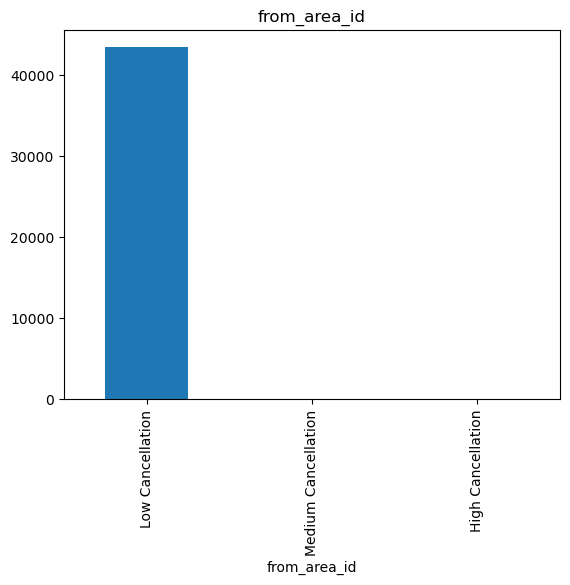

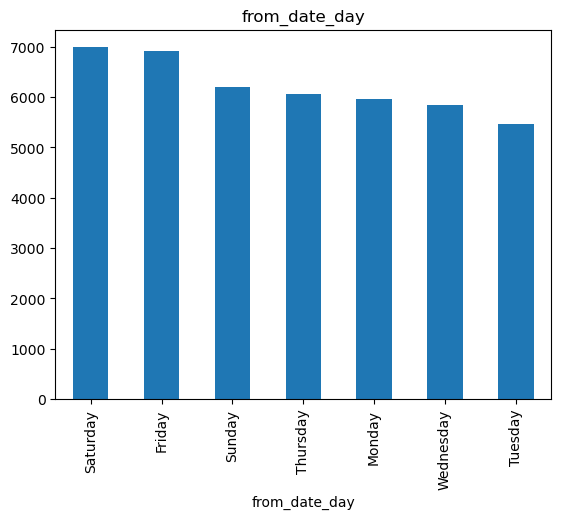

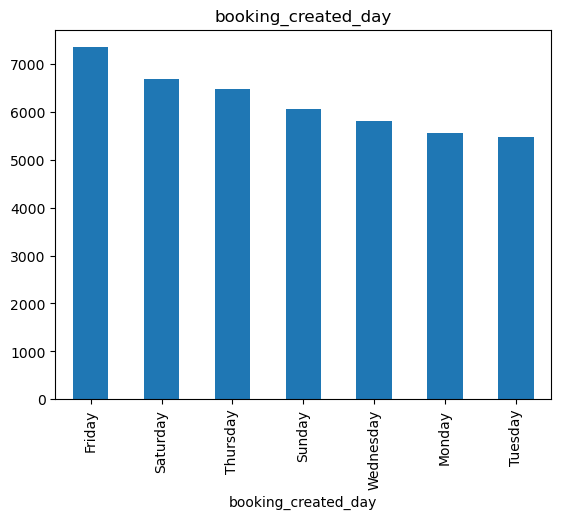

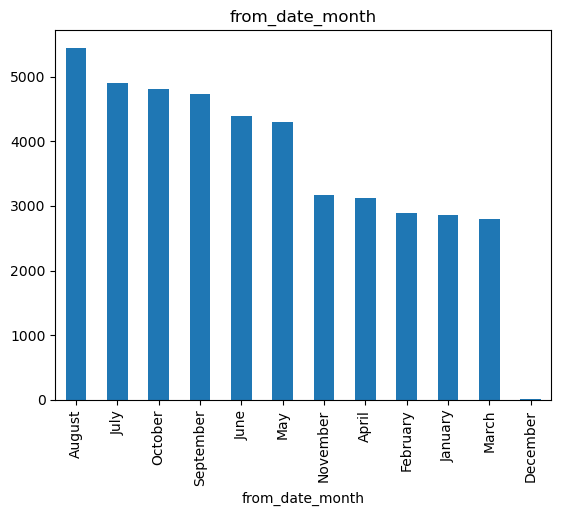

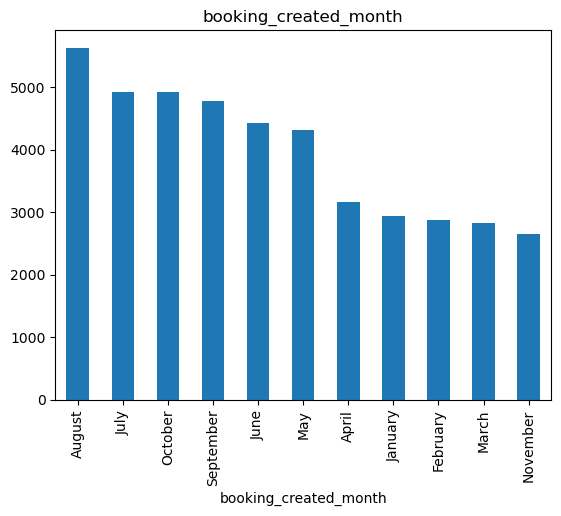

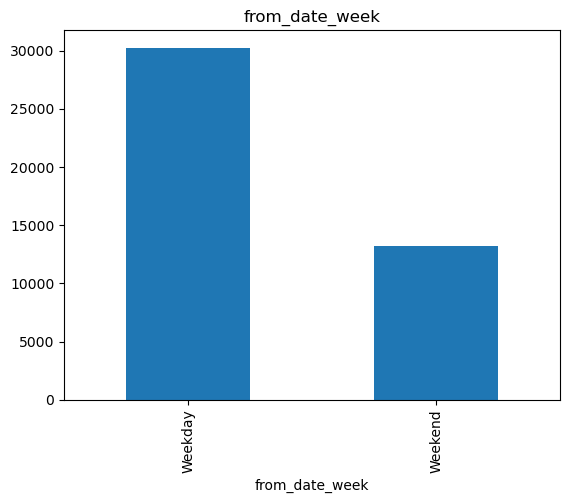

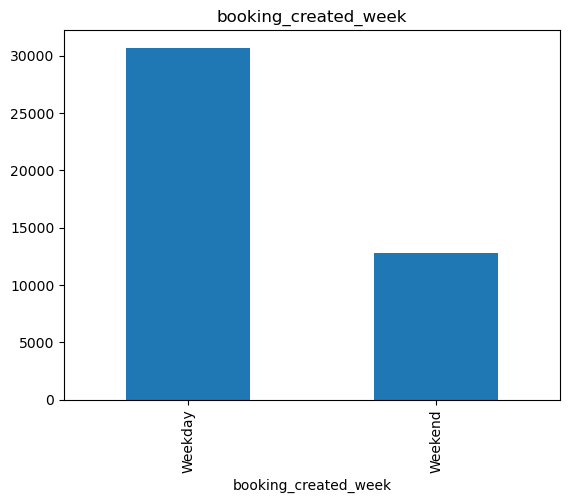

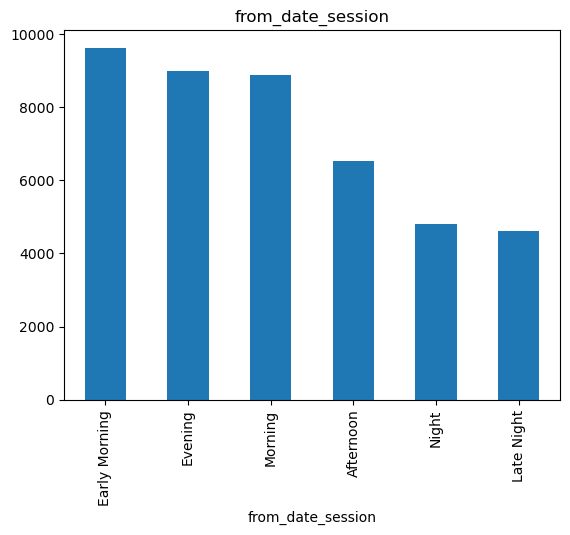

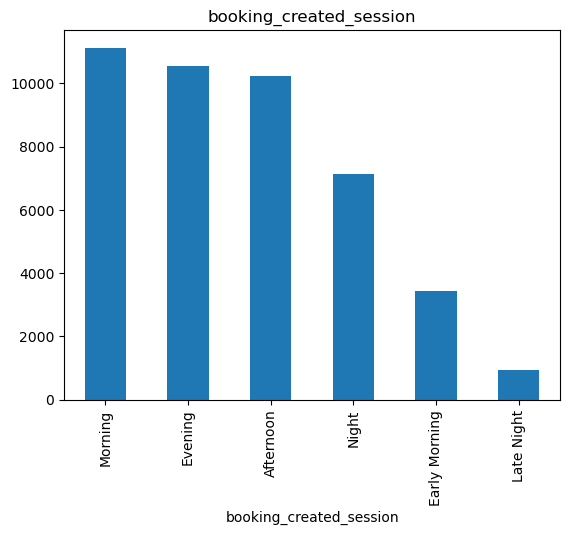

In [67]:
for col in x.columns:
  if x[col].dtype == 'object':
    x[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

# Dividing data into Numerical and Categorical dataframes¶


In [68]:
num = x.select_dtypes(include='number')
char = x.select_dtypes(include='object')

In [69]:
num.head()

,online_booking,mobile_site_booking,distance,time_diff
0,0,0,3.980687,21.0
1,0,0,14.004432,395.0
2,0,0,12.648909,22.0
3,0,0,9.534596,66.0
4,0,0,14.655467,67.0


In [70]:
char.head()

,from_area_id,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session
0,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night
1,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night
2,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night
3,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night
4,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning


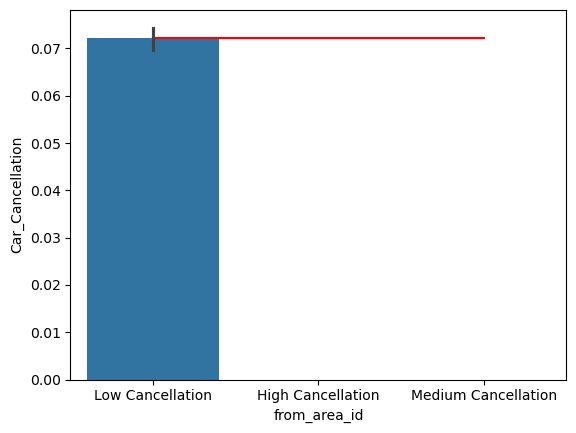

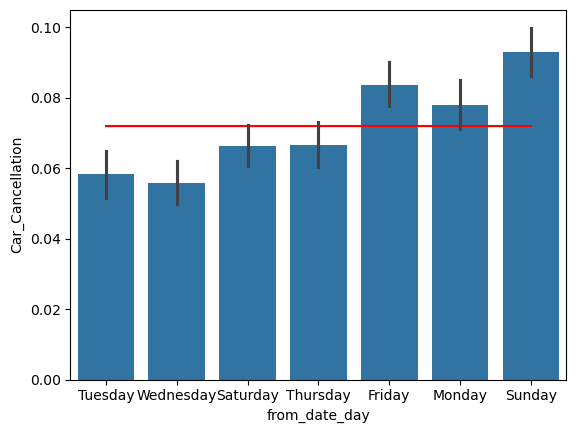

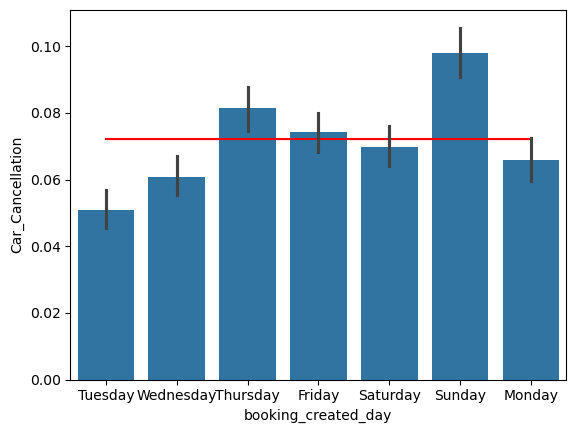

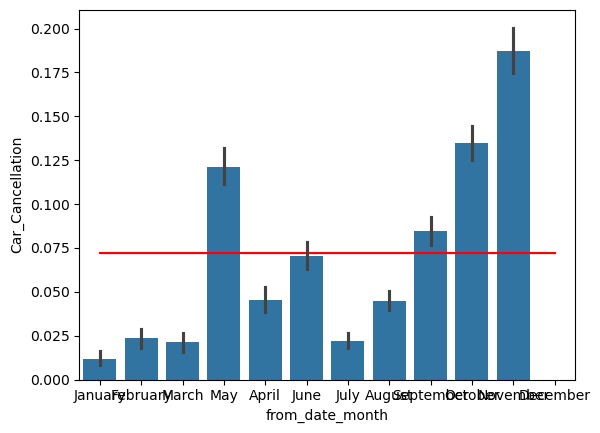

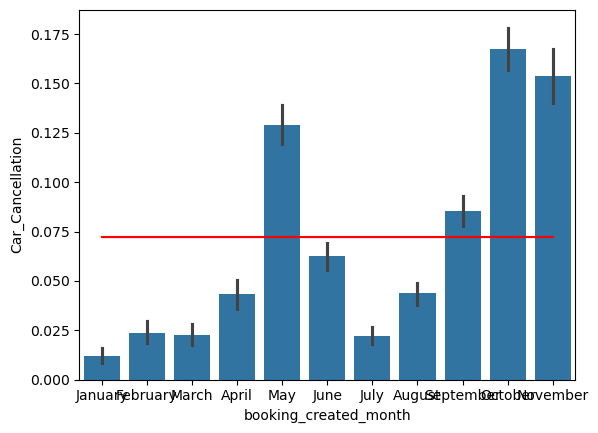

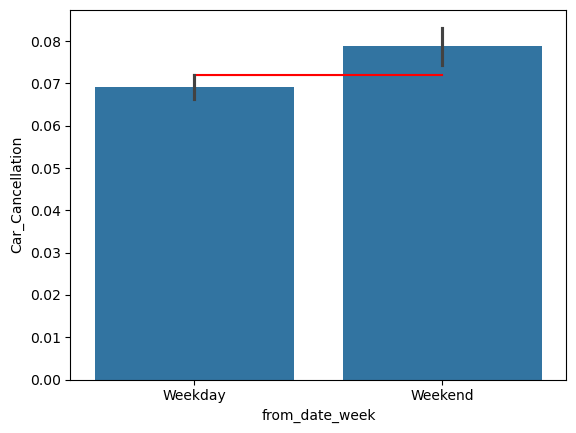

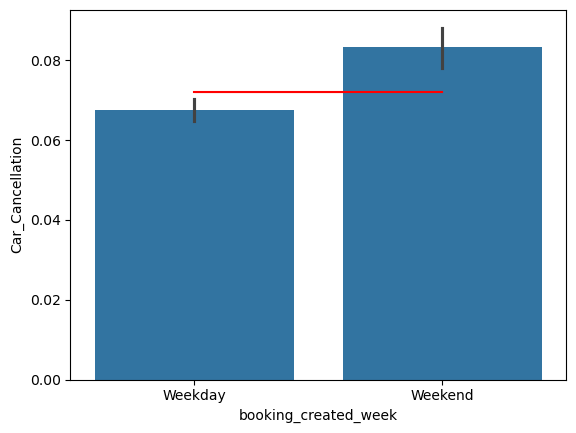

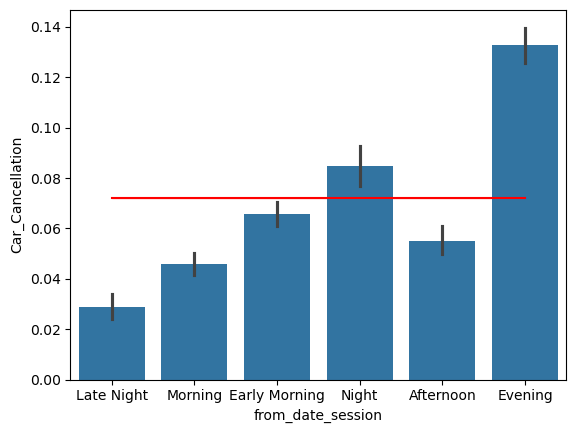

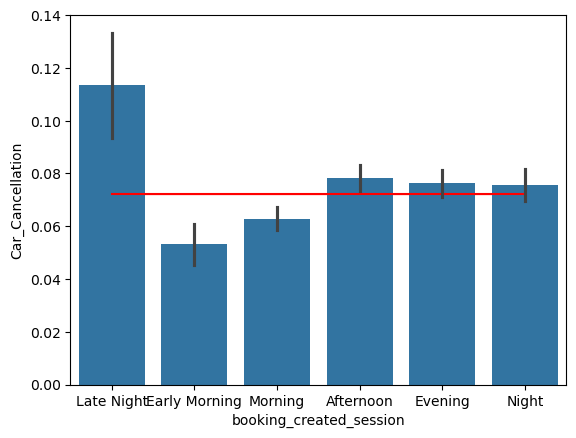

In [71]:
X_char_merged = pd.concat([char,y],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_char_merged['Car_Cancellation'].mean(), data=X_char_merged,estimator=mean, color='red')
    sns.barplot(x=col, y='Car_Cancellation', data=X_char_merged,estimator=mean)
plt.show()

# Encoding Categorical variables¶


In [72]:
X_char_dum = pd.get_dummies(char, drop_first = True).astype('int')
X_char_dum.shape

(43431, 47)

In [73]:
X_char_dum.head()

,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [74]:
data_all = pd.concat([num,X_char_dum],axis=1,join='inner')

In [75]:
data_all.head()

,online_booking,mobile_site_booking,distance,time_diff,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
0,0,0,3.980687,21.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,14.004432,395.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,12.648909,22.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,9.534596,66.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,14.655467,67.0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [79]:
y = dataset[['Car_Cancellation']]

In [80]:
y.head()

,Car_Cancellation
0,0
1,0
2,0
3,0
4,0


3132 40299


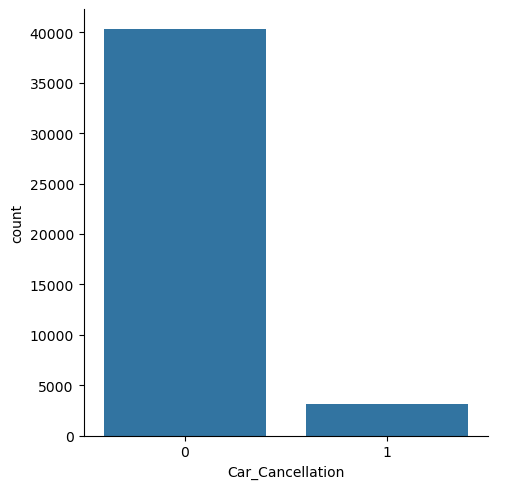

In [83]:
yes = dataset[dataset["Car_Cancellation"]==1].shape[0]
no = dataset[dataset["Car_Cancellation"]==0].shape[0]
print(yes, no)
sns.catplot(data=dataset, x="Car_Cancellation", kind="count")

In [84]:
# balance the data
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(data_all, y)

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "Random forest" : RandomForestClassifier(),
    "Decision tree" : DecisionTreeClassifier(),
    "logisitic Regression" : LogisticRegression(),
    "knn classifier" : KNeighborsClassifier(),
    "xgb" : XGBClassifier()
}

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
                            confusion_matrix


def evaluate_clf(true, predicted):
    
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)    
    pre = precision_score(true, predicted)    
    recall = recall_score(true, predicted)    
    roc = roc_auc_score(true, predicted)  
    
    return acc, f1, pre, recall, roc


# def total_cost(y_true,y_pred):
#     tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
#     cost = 10*fp + 500*fn
    
#     return cost

In [122]:
from sklearn.model_selection import train_test_split

def evaluate_model(X, y, models):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    
    accuracy_list = []
    model_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # training the model
        
        # make prediction
        y_test_pred = model.predict(X_test)
        
        acc, f1, pre, recall, roc = evaluate_clf(y_test, y_test_pred)
        
        # calculate the cost
        #test_cost = total_cost(y_test, y_test_pred)
        
        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])
        
        print("Model performance for test Set")
        print(f"- Accuracy: {acc}")
        print(f"- f1 score: {f1}")        
        print(f"- precision score: {pre}")        
        print(f"- Recall: {recall}")        
        print(f"- roc: {roc}")
        #print(f"- total cost : {test_cost}")
        
        accuracy_list.append(acc)
        
        print("="*35)
        print("\n")
        
    report = pd.DataFrame(list(zip(model_list, accuracy_list)), 
                               columns=["Model Name", 'Accuracy']).sort_values(by=["Accuracy"])
                          
    return report

In [123]:
report_evaluation = evaluate_model(X_res, y_res, models)

Random forest
Model performance for test Set
- Accuracy: 0.9553548875978782
- f1 score: 0.9554477282752536
- precision score: 0.9645038167938931
- Recall: 0.9465601198651517
- roc: 0.9554571392733194


Decision tree
Model performance for test Set
- Accuracy: 0.9300959838343016
- f1 score: 0.9316708845133016
- precision score: 0.9212646484375
- Recall: 0.9423148957422899
- roc: 0.9299539216158746


logisitic Regression
Model performance for test Set
- Accuracy: 0.8862717858044961
- f1 score: 0.8870067130936696
- precision score: 0.8914249684741488
- Recall: 0.8826320389561743
- roc: 0.8863141030350057


knn classifier
Model performance for test Set
- Accuracy: 0.7819525132609245
- f1 score: 0.8180428940296148
- precision score: 0.7076951130561634
- Recall: 0.9691596953427394
- roc: 0.7797759636800576


xgb
Model performance for test Set
- Accuracy: 0.9473351856529426
- f1 score: 0.9477574542721122
- precision score: 0.9509742300439975
- Recall: 0.9445623673367461
- roc: 0.94736742360704

In [124]:
report_evaluation

,Model Name,Accuracy
3,knn classifier,0.781953
2,logisitic Regression,0.886272
1,Decision tree,0.930096
4,xgb,0.947335
0,Random forest,0.955355


In [125]:
# final Model and Report
final_model = RandomForestClassifier()



In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=101)

In [127]:
final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [128]:
accuracy_score(y_pred, y_test)

0.9546602677443798

In [95]:
import sklearn
print(sklearn.__version__)


1.5.1


In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_pred, y_test)



array([[7543,  434],
       [ 284, 7575]], dtype=int64)

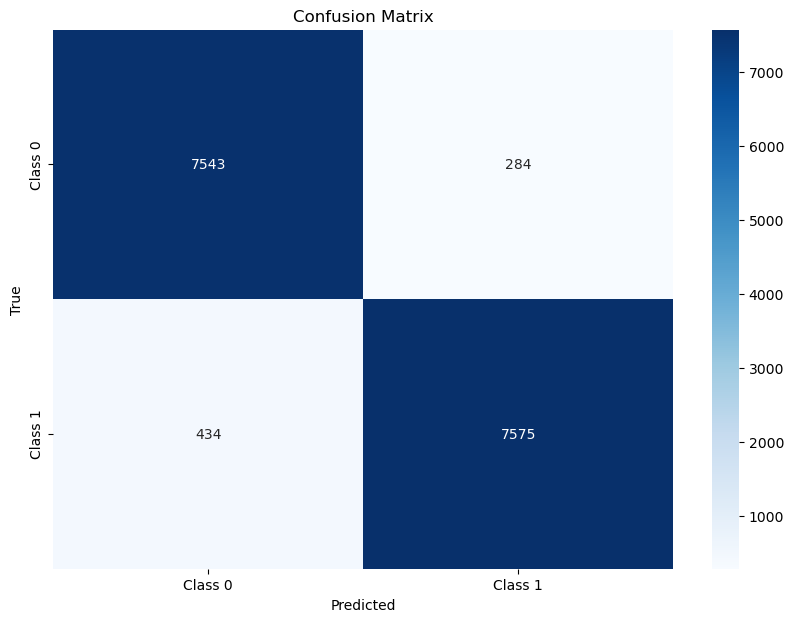

In [130]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()